# Tematyka
Tematem metaanalizy jest wpływ oscylacji mózgowych z czasu przed zaprezentowaniem bodźca na skutecznośc jego percepcji (np. poprawność czy szybkość reakcji). Skupiłem się na jednym paśmie częstotliwościowym - paśmie `alfa` (ok `8 - 12 Hz`), które wiąże się niekorzystnie z przetworzeniem bodźca. Tzn. prezentacje bodźca przed którymi w mózgu (np. w okolicach ciemieniowych) osoby badanej była wysoka amplituda oscylacji alfa kończą się częściej niepoprawnymi, albo wolniejszymi reakcjami.

## Przygotowania
Instaluję potrzebne pakiety (`meta`, `metafor` - do metaanalizy oraz `XLSOConnect` aby wczytać dane zapisane w excelu) i wczytuję dane:

In [8]:
for (lib in c("meta", "metafor")) {
    is_installed = lib %in% rownames(installed.packages())
    if (!meta_installed) {
        install.packages(lib, repos="https://cran.r-project.org")
    }
}

package 'meta' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\swps\AppData\Local\Temp\RtmpAndzVR\downloaded_packages
package 'metafor' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\swps\AppData\Local\Temp\RtmpAndzVR\downloaded_packages


In [9]:
install.packages("XLConnect", repos="https://cran.r-project.org")

also installing the dependencies 'XLConnectJars', 'rJava'



package 'XLConnectJars' successfully unpacked and MD5 sums checked
package 'rJava' successfully unpacked and MD5 sums checked
package 'XLConnect' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\swps\AppData\Local\Temp\RtmpAndzVR\downloaded_packages


### Wczytuję bazę do metaanalizy

In [11]:
library("XLConnect")

Warning message:
: package 'XLConnect' was built under R version 3.3.1Loading required package: XLConnectJars
Warning message:
: package 'XLConnectJars' was built under R version 3.3.1XLConnect 0.2-12 by Mirai Solutions GmbH [aut],
  Martin Studer [cre],
  The Apache Software Foundation [ctb, cph] (Apache POI, Apache Commons
    Codec),
  Stephen Colebourne [ctb, cph] (Joda-Time Java library),
  Graph Builder [ctb, cph] (Curvesapi Java library)
http://www.mirai-solutions.com ,
http://miraisolutions.wordpress.com


In [12]:
pth = "C:\\Users\\swps\\Dropbox\\Sarenka\\metaanaliza\\baza.xlsx"
df <- readWorksheetFromFile(pth, sheet=1)

In [13]:
head(df)

,study,year,title,domain,frequency,meausre,chanOrSource,region,behavioral.measure,Col10,Col11,Col12,notes,d,N,uwagi
1,1,2008,Prestimulus Oscillatory Activity in the Alpha Band Predicts Visual Discrimination Ability,vision,alpha,amplitude/power,source,NA,HitRate,"only p :( (dependent), 21 subjects but only 8 analyzed?! p=0.008",NA,NA,NA,2.7565,8,NA
2,2,2009,To see or not to see,vision,alpha,phase,channel,NA,NA,"F(1,10) = 6.48, p < 0.05",NA,NA,"They showed, as predicted, that the effect of phase was only reliable for high- power trials. For low- power trials, there was no effect of phase (45–225° = 0.73, 225–45° = 0.73, t(10) = 0.35, n.s.), whereas at high levels of power, there was a significant effect of phase (45–225 = 0.67, 225–45° = 0.71, t(10) = 4.53, p < 0.005).",1.138,11,"d jest z ANOVY dla dwóch grup - faktycznie pomiary są wewnątrz osób dla różnych binów fazy, ale nie wiem czy odpowiednia ANOVA była liczona w badaniu oraz nie znalazłem kalkulatora/wzrou do przeliczania mixed anovy na d cohena"
3,2,2009,To see or not to see,vision,alpha,amplitude/power,channel,NA,NA,"F(1,10) = 16.43, p < 0.005 (linear trend; oscill -> hitrate)","M = 2.63; t(10)= 2.67, p < 0.025 (udet vs det alpha power)",NA,NA,1.6191,11,NA
4,3,2010,On the Role of Prestimulus Alpha Rhythms over Occipito-Parietal Areas in Visual Input Regulation - Correlation or Causation,vision,alpha,TMS stimulation,TMS,NA,NA,NA,NA,NA,"At the train offsets (0 s delay), we found a significant two-way interaction between TMS frequency (5 Hz vs 10 Hz vs 20 Hz) and target position (contralateral vs ipsilateral to TMS) (F(2,32) 9.7; p 0.0005), in line with rhythmic TMS affecting perception in a frequency- and space-specific manner. Target detection in the contralateral versus ipsilateral visual fields to TMS was differentially affected by 10 Hz TMS (simple effect of target position: F(1,16) 13.5, p 0.002) (Fig. 2A, middle bars) but not by 5 Hz (F(1,16) 0.3, p 0.63) or 20 Hz TMS (F(1,16) 1.7, p 0.21) (Fig. 2A, lateral bars). In the visual field contralateral to rhythmic stimulation, 10 Hz TMS significantly impaired target detection, relative to the 5Hz (simple effect of TMS frequency: F(1,16) 5.7, p 0.029) and 20 Hz TMS (F(1,16) 4.7, p 0.045) (Fig. 2A, dark gray bars). Conversely, in the visual field ipsilateral to rhythmic stimulation, 10 Hz TMS significantly enhanced target detection, relative to the 5 Hz (F(1,16) 6.0, p 0.025) and 20 Hz conditions (F(1,16) 12.4, p 0.003) (Fig. 2A, light gray bars).",1.441,14,NA
5,4,2011,The Phase of Ongoing Oscillations Mediates the Causal Relation between Brain Excitation and Visual Perception,vision,alpha,phase,NA,occipital,NA,NA,NA,NA,"More precisely, phosphene probability was computed for each phase bin, then averaged over all electrodes for each region of interest and over all subjects. In both regions, phosphene perception was systematically and significantly modulated by alpha phase (one-way ANOVA, F(9,89) = 2.35, p = 0.021 for the occipital region; F(9,89) = 2.72, p = 0.008 for the frontal region). In fact, between the optimal phase angle and the opposite one, phosphene perception varied by as much as 15% on average.",0.766,9,NA
6,4,2011,The Phase of Ongoing Oscillations Mediates the Causal Relation between Brain Excitation and Visual Perception,vision,alpha,phase,NA,frontal,NA,NA,NA,NA,"More precisely, phosphene probability was computed for each phase bin, then averaged over all electrodes for each region of interest and over all subjects. In both regions, phosphene perception was systematically and significantly modulated by alpha phase (one-way ANOVA, F(9,89) = 2.35, p = 0.021 for the occipital region; F(9,89) = 2.72, p = 0.008 for the frontal region). In fact, between the optimal phase angle and the opposite one, phosphene perception varied by as much as 15% on average.",0.825,9,NA


### Zakodowane badania
Udało mi się zakodować 7 badań, z czego każde opisuje kilka efektów. Zdecydowanie kodowanie bazy był najmniej przyjemną częścią zadania. Dosyć typowe w literaturze neuronaukowej jest podawanie np. samych wartości `p` (i wcale nie tylko w sytuacji gdy były stosowane testy permutacyjne), albo podawanie szczątkowych informacji na temat przeprowadzonych testów, czy wręcz przeprowadzanie niepoprawnych testów. Kiedy indziej stosuje się bardziej egzotyczne testy (np. gdy mamy do czynienia z cyklicznymi zmiennymi jak faza oscylacji).

In [15]:
df$study

[1] 1 2 2 3 4 4 5 6 6 6 6 7 7

In [14]:
df$year

[1] 2008 2009 2009 2010 2011 2011 2013 2004 2004 2004 2004 2009 2009

Jak przystało na neuronaukę badania są niewielkiej liczbie osób:

In [23]:
agg_df = aggregate(df$N, by=list(df$study), FUN=mean)
N = agg_df$x
N

[1]  8 11 14  9 13 14 12

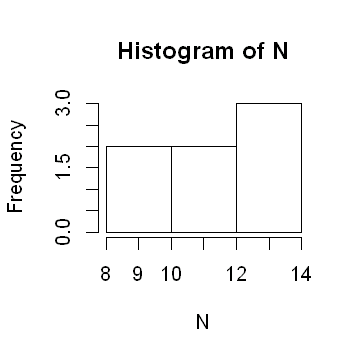

In [26]:
options(repr.plot.width=3, repr.plot.height=3)
hist(N)

## Selekcja zmiennych


In [52]:
take_col = colnames(df)[c(1, 2, 4, 6, 9, 14, 15)]
df_red = df[, take_col]

library(plyr)
df_red = rename(df_red, c("behavioral.measure"="beh"))
df_red$d = vapply(df_red$d, as.numeric, 2.3)
head(df_red)

,study,year,domain,meausre,beh,d,N
1,1,2008,vision,amplitude/power,HitRate,2.7565,8
2,2,2009,vision,phase,NA,1.138,11
3,2,2009,vision,amplitude/power,NA,1.6191,11
4,3,2010,vision,TMS stimulation,NA,1.441,14
5,4,2011,vision,phase,NA,0.766,9
6,4,2011,vision,phase,NA,0.825,9


Robię korektę Hedges'a

In [54]:
hedges = function(d, N){
    frac = 1 - 3 / (4 * N - 9)
    d_prim = d * frac
    return(d_prim)
}
df_red$d = hedges(df_red$d, df_red$N)

Liczę wariancję - kodowałem wszystko jako `d` Cohena, ale wszystkie porównania sa wewnątrz osób więc N1 = N2

In [58]:
n = df_red$N
df_red$var = (2 * n)/(n^2) + df_red$d / (4 * n)

Wyrzucam jeszcze d > 4 - jedno badanie w dwóch efektach dopasowywało nieliniową regresję i niewiarygodnie wysokie R**2 im wychodziło

In [68]:
select = !(df_red$d > 4)
df = df_red[select, ]

## Efekty stałe

In [60]:
library("metafor")

Warning message:
: package 'metafor' was built under R version 3.3.1Loading required package: Matrix
Loading 'metafor' package (version 1.9-8). For an overview 
and introduction to the package please type: help(metafor).


Całkowity efekt, bez uwzględniania różnych badań oraz różnych efektów (amplituda / faza)

In [101]:
mdl = rma(yi=d, vi=var, method="FE", data=df)
mdl


Fixed-Effects Model (k = 11)

Test for Heterogeneity: 
Q(df = 10) = 42.8967, p-val < .0001

Model Results:

estimate       se     zval     pval    ci.lb    ci.ub          
  1.4543   0.1364  10.6600   <.0001   1.1869   1.7216      *** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


Oszacowany efekt: 1.4543, ale nie daję wiary więc sprawdzam analizę z efektami losowymi

## Efekty losowe

In [79]:
rma(yi=d, vi=var, method="REML", data=df)


Random-Effects Model (k = 11; tau^2 estimator: REML)

tau^2 (estimated amount of total heterogeneity): 0.6781 (SE = 0.3967)
tau (square root of estimated tau^2 value):      0.8234
I^2 (total heterogeneity / total variability):   76.76%
H^2 (total variability / sampling variability):  4.30

Test for Heterogeneity: 
Q(df = 10) = 42.8967, p-val < .0001

Model Results:

estimate       se     zval     pval    ci.lb    ci.ub          
  1.4736   0.2841   5.1868   <.0001   0.9167   2.0304      *** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


## Model mieszany

Cały czas szacowany efekt jest niezwykle wysoki, ale zwiększył się błąd, więc mniejsza istotność.
Faktycznie niektóre efekty pochodzą z tych samych badań, są więc bardziej skorelowane ze sobą, korzystamy z modelu mieszanego:

In [80]:
rma.mv(d, var, random = ~ 1 | study, data=df)


Multivariate Meta-Analysis Model (k = 11; method: REML)

Variance Components: 

            estim    sqrt  nlvls  fixed  factor
sigma^2    0.6997  0.8365      7     no   study

Test for Heterogeneity: 
Q(df = 10) = 42.8967, p-val < .0001

Model Results:

estimate       se     zval     pval    ci.lb    ci.ub          
  1.4955   0.3482   4.2954   <.0001   0.8131   2.1778      *** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [86]:
# błąd w nazwie kolumny, drobne poprawki
df = rename(df, c("meausre"="measure"))
df[4, "measure"] = "amplitude/power" # stymulacja TMS faktycznie wpływa na amplitudę oscylacji
df$measure = as.factor(df$measure)
head(df)

,study,year,domain,measure,beh,d,N,var
1,1,2008,vision,amplitude/power,HitRate,2.39695652173913,8,0.324904891304348
2,2,2009,vision,phase,NA,1.04045714285714,11,0.205464935064935
3,2,2009,vision,amplitude/power,NA,1.48032,11,0.215461818181818
4,3,2010,vision,amplitude/power,NA,1.34902127659574,14,0.166946808510638
5,4,2011,vision,phase,NA,0.680888888888889,9,0.241135802469136
6,4,2011,vision,phase,NA,0.733333333333333,9,0.242592592592593


In [89]:
typeof(df$measure[1])

[1] "integer"

Jako ostatnią analizę sprawdzam czy różnią się od siebie efekty fazy i amplitudy:

In [90]:
rma.mv(d, var, mods= ~ measure, random = ~ 1 | study, data=df)


Multivariate Meta-Analysis Model (k = 11; method: REML)

Variance Components: 

            estim    sqrt  nlvls  fixed  factor
sigma^2    0.5041  0.7100      7     no   study

Test for Residual Heterogeneity: 
QE(df = 9) = 27.9462, p-val = 0.0010

Test of Moderators (coefficient(s) 2): 
QM(df = 1) = 1.8013, p-val = 0.1796

Model Results:

              estimate      se     zval    pval    ci.lb   ci.ub     
intrcpt         1.7150  0.3479   4.9298  <.0001   1.0332  2.3968  ***
measurephase   -0.5081  0.3786  -1.3421  0.1796  -1.2501  0.2339     

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


Miara oscylacji (amplituda vs faza) nie jest istotnym moderatorem.
Co ciekawe, istotnym moderatorem jest rok publikacji - nowe badania prezentują słabsze efekty:

In [98]:
rma.mv(d, var, mods= ~ year, random = ~ 1 | study, data=df)


Multivariate Meta-Analysis Model (k = 11; method: REML)

Variance Components: 

            estim    sqrt  nlvls  fixed  factor
sigma^2    0.2503  0.5003      7     no   study

Test for Residual Heterogeneity: 
QE(df = 9) = 14.8793, p-val = 0.0943

Test of Moderators (coefficient(s) 2): 
QM(df = 1) = 8.0455, p-val = 0.0046

Model Results:

         estimate        se     zval    pval     ci.lb     ci.ub    
intrcpt  513.4785  180.5063   2.8447  0.0044  159.6927  867.2643  **
year      -0.2548    0.0898  -2.8365  0.0046   -0.4309   -0.0788  **

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


Ale efekt ten najprawdopodobniej opiera się przede wszystkim na jednym badaniu z 2004 roku o nadzwyczaj entuzjastycznych wynikach:

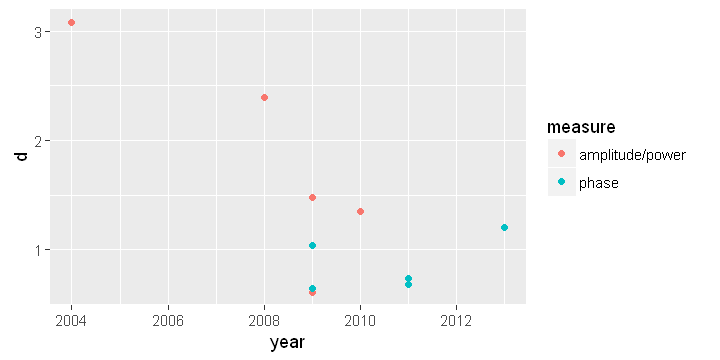

In [96]:
library(ggplot2)
options(repr.plot.width=6, repr.plot.height=3)
p = ggplot(df, aes(year, d, color=measure))
p + geom_point()

## Funnel plot

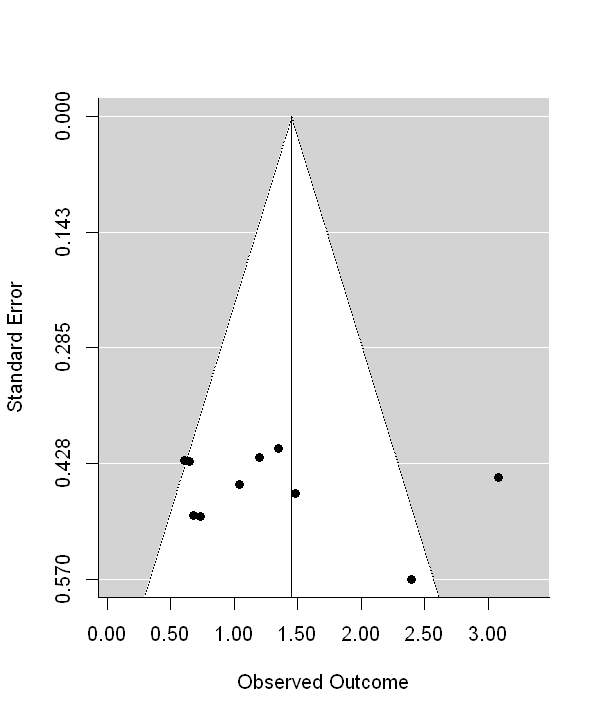

In [103]:
library(metafor)
options(repr.plot.width=5, repr.plot.height=6)
funnel(mdl)

Wykres sugeruje efekt szuflady (chociaż sugestia ta jest delikatna - jeden punkt daje wrażenie liniowej zależności)